# Qatal
## Interpretations of qatal semantics in the translations

In [1]:
from my_tools import *

# Qatal

In [2]:
qatal_df.head()

,ref,book,book_super,canon_part,text_full,text_plain,lex,lex_etcbc,gloss,verb_form,...,esv_TAMspan,niv,niv_tags,niv_VBtags,niv_tense,niv_aspect,niv_modality,niv_TAM,niv_TAMtag,niv_TAMspan
bhsa_node,,,,,,,,,,,,,,,,,,,,,
3,Genesis 1:1,Genesis,Genesis,Law,בָּרָ֣א,ברא,ברא,BR>[,create,qtl,...,created,created,VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,created
15,Genesis 1:2,Genesis,Genesis,Law,הָיְתָ֥ה,היתה,היה,HJH[,be,qtl,...,was,was,VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,was
47,Genesis 1:4,Genesis,Genesis,Law,טֹ֑וב,טוב,טוב,VWB[,be good,qtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Genesis 1:5,Genesis,Genesis,Law,קָ֣רָא,קרא,קרא,QR>[,call,qtl,...,called,he called,PRP|VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,called
172,Genesis 1:10,Genesis,Genesis,Law,קָרָ֣א,קרא,קרא,QR>[,call,qtl,...,called,he called,PRP|VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,called


In [3]:
qatal_df.columns

Index(['ref', 'book', 'book_super', 'canon_part', 'text_full', 'text_plain',
       'lex', 'lex_etcbc', 'gloss', 'verb_form', 'stem', 'person', 'gender',
       'number', 'sentence', 'genre', 'domain', 'period', 'txt_type',
       'clause_type', 'clause_rela', 'adjacent_waw', 'mother_clause',
       'mother_type', 'valence', 'lxx', 'lxx_tense', 'lxx_voice', 'lxx_mood',
       'lxx_person', 'lxx_number', 'lxx_tm', 'preceding_waw', 'wordsb4waw',
       'esv', 'esv_tags', 'esv_VBtags', 'esv_tense', 'esv_aspect',
       'esv_modality', 'esv_TAM', 'esv_TAMtag', 'esv_TAMspan', 'niv',
       'niv_tags', 'niv_VBtags', 'niv_tense', 'niv_aspect', 'niv_modality',
       'niv_TAM', 'niv_TAMtag', 'niv_TAMspan'],
      dtype='object')

# LXX

### Overall Translation Technique for Qatal

In [4]:
# book raw counts
lxx_qvb = pd.pivot_table(
    qatal_df,
    index='book_super',
    columns='lxx_tm',
    aggfunc='size',
    fill_value=0,
)

# book prop counts
lxx_qvb_prop = lxx_qvb.div(lxx_qvb.sum(1), 0)

In [5]:
lxx_qatal_verbs = qatal_df.lxx_tm.value_counts()
lxx_qv_prop = lxx_qatal_verbs / lxx_qatal_verbs.sum()

In [6]:
lxx_qv_prop

aorist indc        0.512833
future indc        0.261219
perfect indc       0.050333
present indc       0.047289
imperfect indc     0.038787
aorist subj        0.030126
aorist ptcp        0.016480
present ptcp       0.010759
aorist impv        0.010130
aorist infv        0.006036
perfect ptcp       0.005144
present subj       0.003202
pluperfect indc    0.002729
present impv       0.001942
present infv       0.001365
aorist optv        0.000630
perfect infv       0.000420
future ptcp        0.000262
present optv       0.000105
future subj        0.000052
pluperfect ptcp    0.000052
perfect impv       0.000052
imperfect subj     0.000052
Name: lxx_tm, dtype: float64

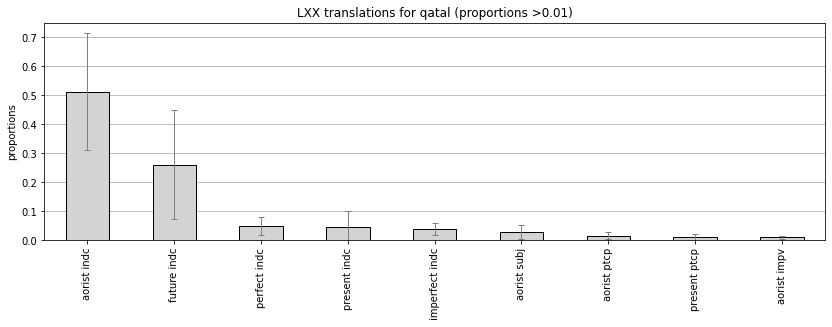

In [7]:
fig, ax = plt.subplots(figsize=(14, 4))
title = 'LXX translations for qatal (proportions >0.01)'
plot_bar_1D(
    lxx_qv_prop[lxx_qv_prop > 0.01], ax, title=title, ylabel='proportions',
    yerr=lxx_qvb_prop.std(),
    error_kw=dict(ecolor='gray', lw=1, capsize=3)
)
plt.ylim(0, 0.75)
save_fig('lxx_qatal_trans')

We will analyze down to the aorist subjunctive.

In [9]:
select_lxx_tenses = lxx_qv_prop[:6].index

select_lxx_tenses

Index(['aorist indc', 'future indc', 'perfect indc', 'present indc',
       'imperfect indc', 'aorist subj'],
      dtype='object')

In [57]:
lxx_transs = qatal_df[qatal_df.lxx_tm.isin(select_lxx_tenses)]

# assemble a count by book(super) which allows us 
# to calculate standard deviations within various 
# segmentations of the LXX
vts_book = pd.pivot_table(
        lxx_transs,
        index='book_super',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0
)

vts_prop = prop_table(vts_book)

# sort by most frequent to least
vts_book = vts_book[vts_book.sum().sort_values(ascending=False).index]

vts_book.head()

lxx_tm,aorist indc,future indc,perfect indc,present indc,imperfect indc,aorist subj,aorist indc,future indc,aorist subj,imperfect indc,present indc,perfect indc
adjacent_waw,False,True,False,False,False,True,True,False,False,True,True,True
book_super,,,,,,,,,,,,
Chronicles,819,55,28,18,79,30,25,1,1,5,1,2
Daniel,79,65,2,1,7,1,11,2,3,1,0,0
Deuteronomy,396,472,51,21,21,91,6,3,4,0,1,0
Exodus,298,427,76,21,27,50,14,2,7,12,2,0
Ezekiel,418,664,94,141,55,22,33,30,20,3,4,4


### By waw-status

In [12]:
lxx_waw = PivotProp(lxx_transs, 'adjacent_waw', 'lxx_tm')

lxx_waw.ct

lxx_tm,aorist indc,future indc,perfect indc,present indc,imperfect indc,aorist subj
adjacent_waw,,,,,,
False,9367,336,938,841,653,144
True,404,4641,21,60,86,430


In [13]:
lxx_waw.pr

lxx_tm,aorist indc,future indc,perfect indc,present indc,imperfect indc,aorist subj
adjacent_waw,,,,,,
False,0.762847,0.027364,0.076391,0.068491,0.053180,0.011727
True,0.071606,0.822581,0.003722,0.010635,0.015243,0.076214


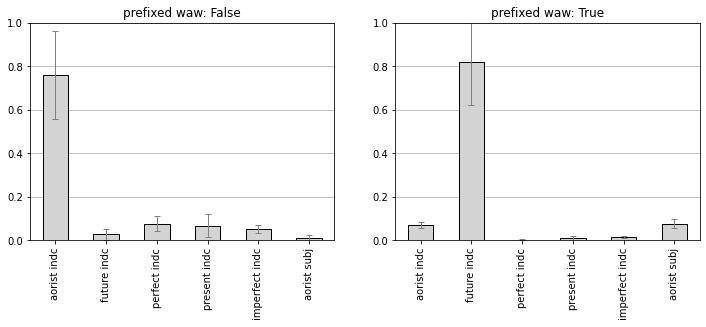

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.ravel()

for i, waw_stat in enumerate([False, True]):
    
    # select status by book to calculate std for error bars
    by_book = vts_prop.loc[:, pd.IndexSlice[:,waw_stat]]
    by_book.columns = by_book.columns.droplevel('adjacent_waw')
    
    data = lxx_waw.pr.loc[waw_stat]
    ax = axs[i]
    plot_bar_1D(
        data, ax, 
        title=f'prefixed waw: {waw_stat}',
        yerr=by_book.std(),
        error_kw=dict(ecolor='gray', lw=1, capsize=3)
    )
    ax.set_ylim(0, 1.0)

In [85]:
vts_prop.loc[:, pd.IndexSlice[:,True]].std()

lxx_tm          adjacent_waw
aorist indc     True            0.014991
aorist subj     True            0.021063
future indc     True            0.198131
imperfect indc  True            0.004575
perfect indc    True            0.002431
present indc    True            0.011422
dtype: float64

In [84]:
vts_prop.loc[:, pd.IndexSlice[:,False]].std()

lxx_tm          adjacent_waw
aorist indc     False           0.202497
aorist subj     False           0.014191
future indc     False           0.023575
imperfect indc  False           0.018927
perfect indc    False           0.034593
present indc    False           0.054549
dtype: float64

### statistics across parts of canon (tripartite)

In [15]:
vts_canon = pd.pivot_table(
        lxx_transs,
        index='canon_part',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0,
)

vts_canon

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
canon_part                                                           
Law                 1717    41          44   233          19  2035   
Prophets            4549   237          65   142         245  2391   
Writings            3101   126          35    55          72   215   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
canon_part                                                               
Law                     127    28          279     1          113     6  
Prophets                342    44          523    13          584    36  
Writings                184    14          136     7          144    18

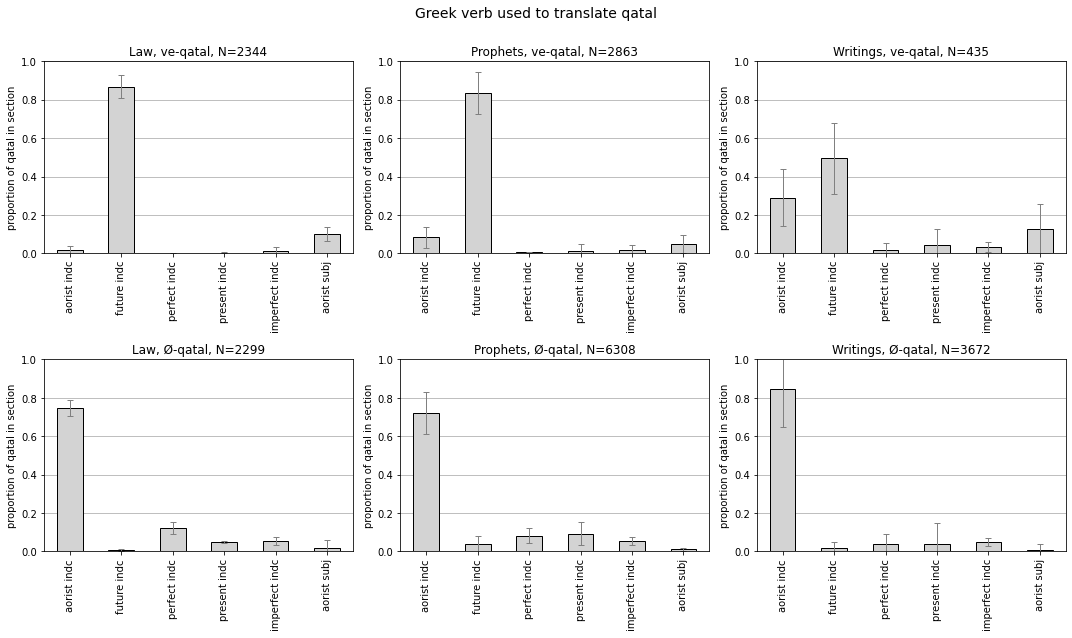

In [92]:
def plot_waw_sections(section_name, book_counts, sect_counts, dims, figsize=(15,9), title=''):
    """Build qatal plots based on various segments / waw-statuses"""

    fig, axs = plt.subplots(dims[0], dims[1], figsize=figsize)
    axs = axs.ravel()
    i = 0
    data_container = collections.defaultdict(dict)
    for waw_status, waw_str in [[True, ', ve-qatal'], [False, ', Ø-qatal']]:

        # use the waw status to retrieve the raw counts 
        # and proportions unique to that status
        # individual book counts are also needed to calculuate the 
        # error bars using standard deviation
        count_books = book_counts.loc[:, pd.IndexSlice[:, waw_status]]
        count_sect = sect_counts.loc[:, pd.IndexSlice[:, waw_status]]
        prop_books = get_props(count_books)
        prop_sect = get_props(count_sect)
        prop_sect.columns = prop_sect.columns.droplevel('adjacent_waw')
        prop_books.columns = prop_books.columns.droplevel('adjacent_waw')

        # sort by sample sizes
        book_counts_clean = book_counts.groupby(level=book_counts.columns.names[0], axis=1).sum()
        prop_sect = prop_sect[book_counts_clean.sum().sort_values(ascending=False).index] # sort on size of samples

        for part in prop_sect.index:

            ax = axs[i]
            i += 1

            data = prop_sect.loc[part]

            books = qatal_df[qatal_df[section_name] == part].book_super.unique()
            tense_stds_inbooks = prop_books.loc[books].std()

            data.plot(
                kind='bar', ax=ax, color='lightgrey', 
                edgecolor='black', yerr=tense_stds_inbooks,
                error_kw=dict(ecolor='gray', lw=1, capsize=3)
            )

            plot_title = f'{part}{waw_str}, N={count_sect.loc[part].sum().sum()}'
            ax.set_title(plot_title)
            ax.set_ylim(0, 1)
            ax.grid(axis='y')
            ax.set_axisbelow(True)
            ax.set_xlabel('')
            ax.set_ylabel('proportion of qatal in section')
            #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
            fig.suptitle(title, size=14)
            fig.tight_layout() # set spacing between plots automatically
        
            data_container[part][waw_status] = data
            data_container[part+'_std'][waw_status] = tense_stds_inbooks
            
    return data_container
        
plot_waw_sections('canon_part', vts_book, vts_canon, (2,3), title='Greek verb used to translate qatal\n')
save_fig('lxx_qatal_canon')

### By period

In [17]:
lxx_period = pd.pivot_table(
        lxx_transs,
        index='period',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0,
)

In [18]:
lxx_period

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
period                                                               
EBH                 3940   146          56   310          41  2540   
LBH                 1241    52           4    42           4   129   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
period                                                                   
EBH                     321    60          550     4          238    27  
LBH                     116     7           37     2           29     1

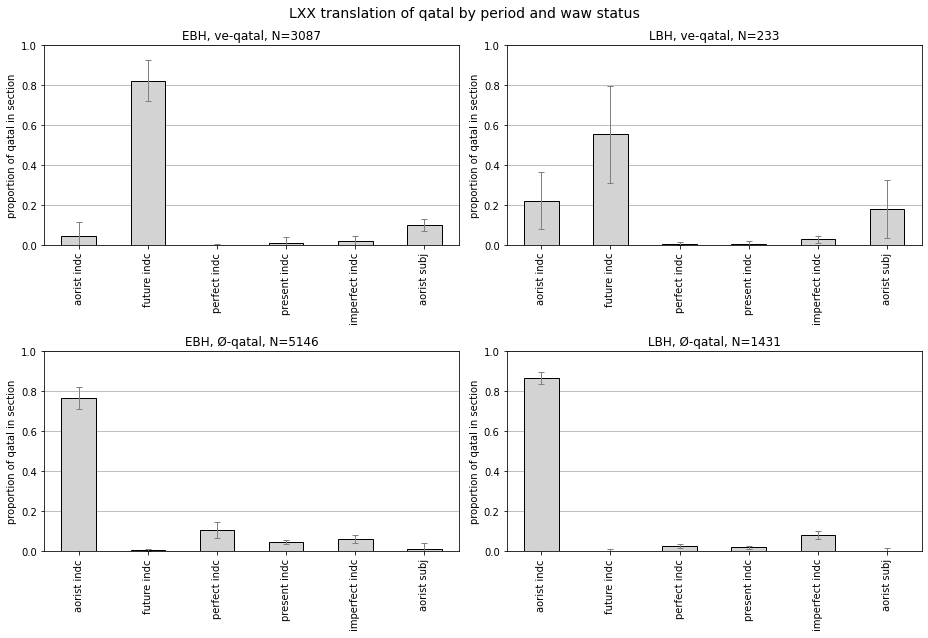

In [20]:
lxx_waw_period = plot_waw_sections(
    'period', vts_book, lxx_period, [2, 2], 
    figsize=(13, 9), title='LXX translation of qatal by period and waw status')
save_fig('lxx_qatal_period')

In [22]:
lxx_transs.genre.value_counts()

prose          7556
prophetic      5380
poetry         2568
instruction    1953
list            464
Name: genre, dtype: int64

In [23]:
pd.pivot_table(
    lxx_transs,
    index='genre',
    columns=['period'],
    aggfunc='size',
    fill_value=0,
)

period,EBH,LBH
genre,,
instruction,1879,0
list,223,241
poetry,173,68
prophetic,15,0
prose,5943,1355


### By Genre

In [24]:
lxx_genre = pd.pivot_table(
        lxx_transs[lxx_transs.genre.isin(['prose', 'prophetic', 'poetry'])],
        index='genre',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0,
)

In [25]:
lxx_genre

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
genre                                                                
poetry              1979    79          29    16          76    79   
prophetic           2229   124          53    63         224  1831   
prose               4558   180          25   203          32  1263   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
genre                                                                    
poetry                   63     5           97     5          122    18  
prophetic               137    11          243    10          440    15  
prose                   412    69          539     6          256    13

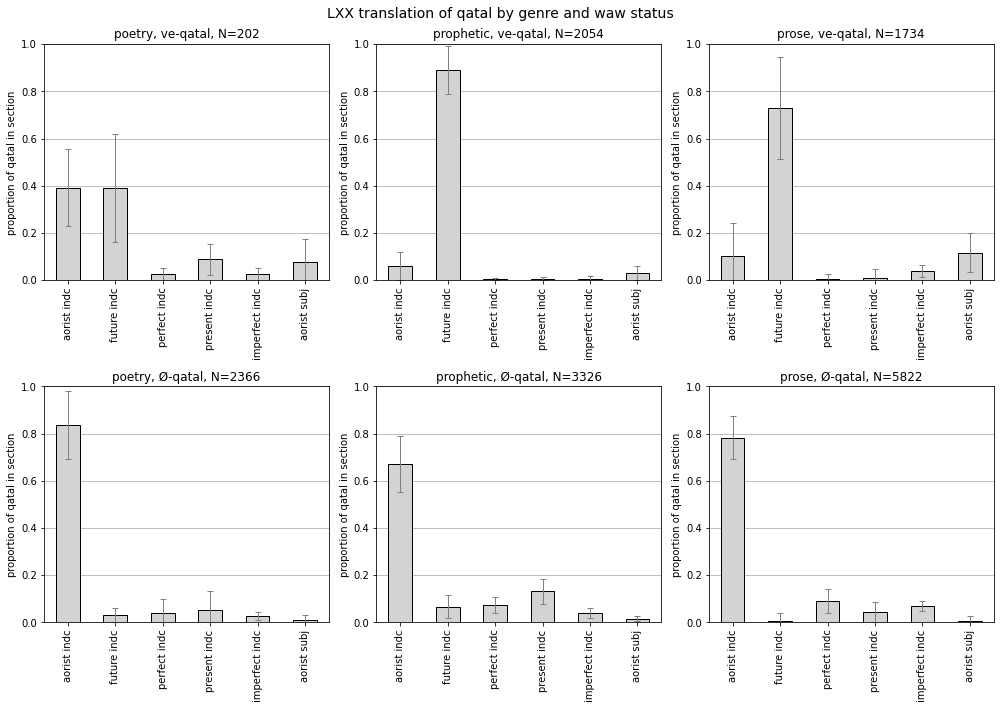

In [93]:
lxx_waw_genre = plot_waw_sections(
    'genre', vts_book, lxx_genre, [2, 3], 
    figsize=(14, 10), title='LXX translation of qatal by genre and waw status')
save_fig('lxx_qatal_genre')

# NB: THE ERROR BARS IN THIS CASE CANNOT BE 
# RELIED ON; they are calculated from books,
# and books can contain numerous genres

In [94]:
lxx_waw_genre['poetry'][True]

lxx_tm
aorist indc       0.391089
future indc       0.391089
perfect indc      0.024752
present indc      0.089109
imperfect indc    0.024752
aorist subj       0.079208
Name: poetry, dtype: float64

In [95]:
lxx_waw_genre['poetry_std'][True]

lxx_tm
future indc       0.227929
aorist subj       0.096910
aorist indc       0.163095
imperfect indc    0.026074
present indc      0.065865
perfect indc      0.026412
dtype: float64

In [27]:
lxx_genre

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
genre                                                                
poetry              1979    79          29    16          76    79   
prophetic           2229   124          53    63         224  1831   
prose               4558   180          25   203          32  1263   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
genre                                                                    
poetry                   63     5           97     5          122    18  
prophetic               137    11          243    10          440    15  
prose                   412    69          539     6          256    13

In [91]:
lxx_genre.loc[:, pd.IndexSlice[:,True]]

lxx_tm,aorist indc,aorist subj,future indc,imperfect indc,perfect indc,present indc
adjacent_waw,True,True,True,True,True,True
genre,,,,,,
poetry,79,16,79,5,5,18
prophetic,124,63,1831,11,10,15
prose,180,203,1263,69,6,13


### Which poetic books show the weakest waw contrast?

We see a weakened contrast in poetic books between qatal and ve-qatal 
uses of qatal. But the standard deviation shows that there is a great
deal of variation in-between books. Let's see which books fall where.

In [117]:
lxx_book_veqatal = vts_book.loc[:, pd.IndexSlice[:, True]]
lxx_book_veqatal_pr = prop_table(lxx_book_veqatal)

lxx_book_veqatal

lxx_tm,future indc,aorist subj,aorist indc,imperfect indc,present indc,perfect indc
adjacent_waw,True,True,True,True,True,True
book_super,,,,,,
Chronicles,55,30,25,5,1,2
Daniel,65,1,11,1,0,0
Deuteronomy,472,91,6,0,1,0
Exodus,427,50,14,12,2,0
Ezekiel,664,22,33,3,4,4
Ezra-Neh,8,10,13,0,0,0
Genesis,142,19,11,10,1,1
Isaiah,394,17,30,2,2,2


In [120]:
lxx_book_veqatal.loc['Proverbs'].sum()

32

In [119]:
lxx_book_veqatal_pr.loc[lxx_transs[lxx_transs.genre == 'poetry'].book_super.unique()]

lxx_tm,future indc,aorist subj,aorist indc,imperfect indc,present indc,perfect indc
adjacent_waw,True,True,True,True,True,True
book_super,,,,,,
Genesis,0.771739,0.103261,0.059783,0.054348,0.005435,0.005435
Exodus,0.845545,0.099010,0.027723,0.023762,0.003960,0.000000
Numbers,0.897756,0.067332,0.014963,0.014963,0.004988,0.000000
Deuteronomy,0.828070,0.159649,0.010526,0.000000,0.001754,0.000000
Judges,0.677083,0.145833,0.135417,0.041667,0.000000,0.000000
Samuel,0.656604,0.105660,0.147170,0.075472,0.007547,0.007547
Twelve,0.903491,0.014374,0.067762,0.010267,0.004107,0.000000
Psalms,0.475410,0.000000,0.459016,0.049180,0.016393,0.000000


# Modern Translations

In [2]:
qatal_df.shape

(20728, 52)

In [3]:
modagr_df = qatal_df[qatal_df.niv_TAM == qatal_df.esv_TAM] # restrict to agreement between sources

modagr_df.shape

(13200, 52)

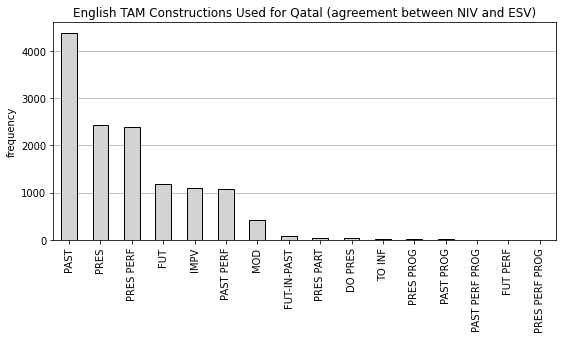

In [4]:
fig, ax = plt.subplots(figsize=(9, 4))
title = 'English TAM Constructions Used for Qatal (agreement between NIV and ESV)'
plot_bar_1D(modagr_df.esv_TAMtag.value_counts(), ax=ax, title=title, ylabel='frequency')
save_fig('mod_qatal_agree')

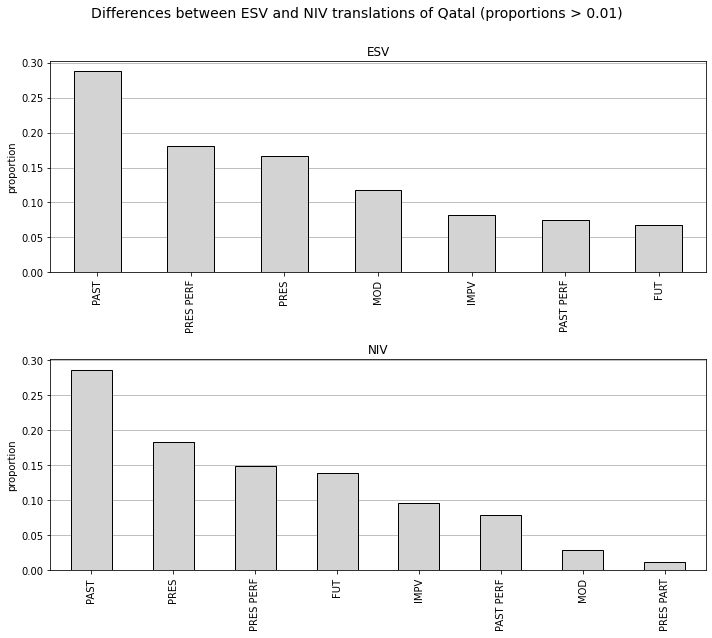

In [124]:
plot_transs = [
    ('ESV', 'esv_TAMtag'),
    ('NIV', 'niv_TAMtag'),
]

fig, axs = plt.subplots(2, 1, figsize=(10, 9))
axs = axs.ravel()

trans2prop = {}

i = 0
for trans, tamtag in plot_transs:
    ax = axs[i]
    title = f'{trans}'
    data = qatal_df[tamtag].value_counts()
    data = data / data.sum()
    data_top = data[data > 0.01]# filter out tiny data
    plot_bar_1D(data_top, ax=ax, title=title, ylabel='proportion')
    trans2prop[trans] = data
    i += 1
    
fig.suptitle('Differences between ESV and NIV translations of Qatal (proportions > 0.01)\n', size=14)
fig.tight_layout() # set spacing between plots automatically
save_fig('mod_trans_diffs')

In [125]:
trans2prop['ESV']

PAST              0.287540
PRES PERF         0.181298
PRES              0.166011
MOD               0.117286
IMPV              0.081395
PAST PERF         0.075311
FUT               0.068357
FUT-IN-PAST       0.007311
PRES PART         0.006391
TO INF            0.003068
DO PRES           0.002761
PAST PROG         0.001636
PRES PROG         0.001023
PRES PERF PROG    0.000256
FUT PERF          0.000256
PAST PERF PROG    0.000102
Name: esv_TAMtag, dtype: float64

In [126]:
trans2prop['NIV']

PAST              0.286269
PRES              0.183168
PRES PERF         0.148958
FUT               0.139094
IMPV              0.096018
PAST PERF         0.078703
MOD               0.028858
PRES PART         0.012120
TO INF            0.008867
FUT-IN-PAST       0.006873
PRES PROG         0.004302
PAST PROG         0.002833
DO PRES           0.002518
PAST PERF PROG    0.000472
PRES PERF PROG    0.000420
FUT PERF          0.000315
GOING TO          0.000210
Name: niv_TAMtag, dtype: float64

In [127]:
qatal_df['niv_TAMtag'].value_counts()

PAST              5456
PRES              3491
PRES PERF         2839
FUT               2651
IMPV              1830
PAST PERF         1500
MOD                550
PRES PART          231
TO INF             169
FUT-IN-PAST        131
PRES PROG           82
PAST PROG           54
DO PRES             48
PAST PERF PROG       9
PRES PERF PROG       8
FUT PERF             6
GOING TO             4
Name: niv_TAMtag, dtype: int64

We make a subselection of translations to focus on:

In [128]:
select_eng_verbs = trans2prop['ESV'][trans2prop['ESV'] > 0.01].index
select_eng_verbs

Index(['PAST', 'PRES PERF', 'PRES', 'MOD', 'IMPV', 'PAST PERF', 'FUT'], dtype='object')

In [129]:
esv_df = qatal_df[qatal_df.esv_TAMtag.isin(select_eng_verbs)]

## Comparing LXX and Modern Translations

In [149]:
# find cases of fundamental disagreement on the 
# tense of a qatal verb

see_cols = ['ref', 'text_full', 'sentence', 'lxx', 'lxx_tm', 'niv', 'esv', 'niv_TAM']

lm_disag_past = modagr_df[
    (modagr_df.niv_TAM.isin(['PAST..IND','PRES.PERF.IND']))
    & (modagr_df.lxx_tm == 'future indc')
    & (~modagr_df.niv.str.match('.*(put|cut|set)')) # these Eng. verbs often not parsed correctly
]

print(lm_disag_past.shape)

lm_disag_past[see_cols].to_csv('inspect/lm_disag_past.csv', index=True)

(78, 52)


## Begin with ESV

In [28]:
mod_book = pd.pivot_table(
        esv_df,
        index='book_super',
        columns=['esv_TAMtag', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0
)

mod_book

esv_TAMtag     FUT        IMPV         MOD        PAST       PAST PERF        \
adjacent_waw False True  False True  False True  False True      False True    
book_super                                                                     
Chronicles       2    23     1    39     7     9   593    12       156     0   
Daniel           0     1     0    16     1    45    45    10         7     0   
Deuteronomy      2    60     9   137     0   232   226     9        50     0   
Exodus           2    62     4    96    10   260   183    22        66     0   
Ezekiel         14   271    11   155     4   210   257    36        42     1   
Ezra-Neh         0     1     2    10     3     4   149     9        59     1   
Genesis          1    56    12    40     9    53   351    12       146     0   
Isaiah          16   186    27    51    18   121   194    12        35     0   
Jeremiah        12   133    35    96    20   150   264    16        94     0   
Job              3     9    23     7     7     3    86     9        18     0   
Joshua           0    10     2    24     3    20   188     3        55     0   
Judges           1    14    10    30     3    15   192    11        82     0   
Kings            1    48     7    79    10    40   575    37       166     1   
Leviticus        3    41     2   145     0   413    62    23         2     1   
Megilloth        4     2     8    19     2     5   206    24        57     1   
Numbers          0    21     0    75     4   200   189    28        43     0   
Proverbs         1     7     8     9     0     0    23     0         6     0   
Psalms           7     8    46     7    12     5   286    15        40     0   
Samuel           4    63    18    92     5    48   415    35       157     0   
Twelve           6   151    25    71     9   162   170    18        24     0   

esv_TAMtag    PRES       PRES PERF        
adjacent_waw False True      False True   
book_super                                
Chronicles      42    17       132     7  
Daniel           8     3        26     0  
Deuteronomy     36    93       173     3  
Exodus          33    50       122     2  
Ezekiel        227    61       189     4  
Ezra-Neh         8     2        32     2  
Genesis         54    15       213     0  
Isaiah         287    33       309     1  
Jeremiah       348    41       363    10  
Job            174    20       113     1  
Joshua          13    58        65     0  
Judges          20     5        74     0  
Kings           90    20       188     4  
Leviticus       22    42        79     5  
Megilloth       91    15       163     1  
Numbers         28    38       116     5  
Proverbs        65    22        36     0  
Psalms         450    20       359     2  
Samuel          82    17       276     3  
Twelve         227    39       185     2

In [29]:
mod_period = pd.pivot_table(
        esv_df,
        index='period',
        columns=['esv_TAMtag', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0
)



mod_period

esv_TAMtag     FUT        IMPV         MOD        PAST       PAST PERF        \
adjacent_waw False True  False True  False True  False True      False True    
period                                                                         
EBH             14   375    64   718    44  1281  2381   180       767     2   
LBH              2    25     3    66    13    61   838    33       257     2   

esv_TAMtag    PRES       PRES PERF        
adjacent_waw False True      False True   
period                                    
EBH            378   338      1306    22  
LBH             66    23       211     9

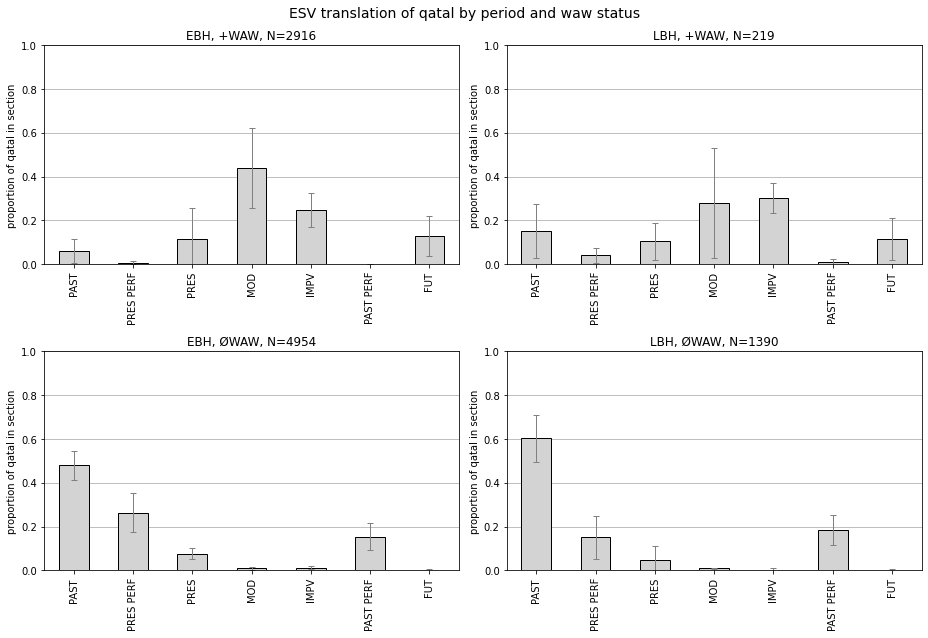

In [30]:
plot_waw_sections(
    'period', mod_book, mod_period, [2,2], 
    figsize=(13,9), title='ESV translation of qatal by period and waw status'
)

save_fig('esv_qatal_period')

### Testing claims 

> "(e)...the perfect of narration occurs especially at the head of an entire narrative (Jb 1:1; cf. Dn 2:1) or an independent sentence (e.g. Gn 7:11.13), but in co-ordinate sentences, as a rule, only when the verb is separated from the copulative ו by one or more words (cf. above Gn 4:4 and 7:19) - GKC §106

In [31]:
past_waw = esv_df[
    (esv_df.esv_TAMtag == 'PAST') & (esv_df.adjacent_waw)
]

past_waw

,ref,book,book_super,canon_part,text_full,text_plain,lex,lex_etcbc,gloss,verb_form,...,esv_TAMspan,niv,niv_tags,niv_VBtags,niv_tense,niv_aspect,niv_modality,niv_TAM,niv_TAMtag,niv_TAMspan
bhsa_node,,,,,,,,,,,,,,,,,,,,,
2685,Genesis 6:4,Genesis,Genesis,Law,יָלְד֖וּ,ילדו,ילד,JLD[,they bore,qtl,...,bore,had children,VBD|NNS,VBD,PAST,NaN,IND,PAST..IND,PAST,had
6772,Genesis 15:6,Genesis,Genesis,Law,הֶאֱמִ֖ן,האמן,אמן,>MN[,he believed,qtl,...,believed,Abram believed,NNP|VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,believed
10067,Genesis 21:25,Genesis,Genesis,Law,הֹוכִ֥חַ,הוכח,יכח,JKX[,he complained,qtl,...,reproved,complained,VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,complained
14602,Genesis 28:6,Genesis,Genesis,Law,שִׁלַּ֤ח,שׁלח,שׁלח,CLX[,he sent,qtl,...,sent,had sent,VBD|VBN,VBD|VBN,PAST,PERF,IND,PAST.PERF.IND,PAST PERF,had sent
14992,Genesis 29:3,Genesis,Genesis,Law,נֶאֶסְפוּ,נאספו,אסף,>SP[,they were gathered,qtl,...,were,were gathered,VBD|VBN,VBD|VBN,PAST,NaN,IND,PAST..IND,PAST,were
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423945,2_Chronicles 33:4,2_Chronicles,Chronicles,Writings,בָנָ֥ה,בנה,בנה,BNH[,he built,qtl,...,built,He built,PRP|VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,built
423984,2_Chronicles 33:6,2_Chronicles,Chronicles,Writings,עֹונֵ֤ן,עונן,ענן,<NN[,he practiced sorcery,qtl,...,used,practised sorcery,VBN|NN,VBN,NaN,NaN,NaN,NaN,NaN,NaN
423990,2_Chronicles 33:6,2_Chronicles,Chronicles,Writings,עָ֥שָׂה,עשׂה,עשׂה,<FH[,he consulted,qtl,...,dealt,consulted,VBN,VBN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
past_waw.to_csv(private_dir.joinpath('inspections/waw_past.csv'))

In [32]:
esv_df.esv_TAMtag.value_counts()

PAST         4995
PRES PERF    3265
PRES         2916
MOD          2122
IMPV         1448
PAST PERF    1310
FUT          1246
Name: esv_TAMtag, dtype: int64